In [1]:
# Created By Mohsen Naghipourfar

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import mifs

In [2]:
data = pd.read_csv('../Data/fpkm_normalized.csv', header=None)
labels = pd.read_csv('../Data/disease.csv', header=None)
results = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)
gene_names = pd.read_csv('../Data/GDCData_GeneNames.csv', header=None)
diseases = labels[0].value_counts().index

In [5]:
data[[4929, 5345, 16381, 13656, 4788]]

,4929,5345,16381,13656,4788
0,0.000,0.000,0.000,0.000,0.000
1,0.005,0.000,0.000,0.000,0.000
2,0.002,0.000,0.000,0.000,0.000
3,0.010,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000
5,0.018,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.105
7,0.001,0.000,0.000,0.000,0.000
8,0.001,0.000,0.000,0.000,0.000
9,0.002,0.000,0.000,0.018,0.000


In [ ]:
random_feature_indices = np.random.choice(19671, 200, replace=False)
all_feature_indices = [i for i in range(19671)]
x_train = data[all_feature_indices]
x_train.columns = gene_names.iloc[all_feature_indices, 0]
y_dummies = pd.get_dummies(labels[0])
del y_dummies[y_dummies.columns[-1]]
data_with_categories = pd.concat([x_train, y_dummies], axis=1)

In [41]:
# n_samples = 1000
# n_features = 200
# n_classes = 34


# y = labels[0].iloc[:n_samples,].astype('category').cat.codes
# # y = y.iloc[:500,]
# X = x_train.iloc[:n_samples,:]
# y.max()

In [40]:
# def MIFS():
#     # define MI_FS feature selection method
#     feature_selector = mifs.MutualInformationFeatureSelector(method='JMI', k=int(y.max()), n_features=200, verbose=2)

#     # find all relevant features
#     feature_selector.fit(X, y)
    
#     return feature_selector

In [39]:
# feature_selector = MIFS()
# MI = feature_selector.mi_
# with open('./MI.txt', 'a') as file:
#     for i in range(len(feature_selector.mi_)):
#       file.write("{0} : {1}\n".format(x_train.columns[feature_selector.ranking_[i]]), MI[i])

In [ ]:
# # Pearson Correlation (Which is not good for categorical Data! :)
corr_matrix = data_with_categories.corr()
corr_matrix
# correlation_matrix = np.corrcoef(new_data.values)
# f, ax = plt.subplots(figsize=(20, 20))
# sns.heatmap(corr_matrix, vmax=1, square=True)
# plt.savefig('./RandomHeatmap.png')

In [107]:
for disease in diseases:
    try:
        k = 20 # Number of Variables for Heatmap
        cols = corr_matrix.nlargest(k, disease)[disease].index
        print(cols)
        # cols = corr_matrix.nlargest(k, '').index
#         cm = np.corrcoef(data_with_categories[cols].values.T)
#         sns.set(font_scale=1.25)
#         plt.subplots(figsize=(15,15))
#         hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
#                          yticklabels=cols.values, xticklabels=cols.values)
#         plt.yticks(rotation=0)
        # plt.figure(figsize=(20, 20))
    #     plt.show()
#         plt.savefig('./Heatmaps/{0}.png'.format(disease))
#         plt.close()
    except:
        continue


In [94]:
# mutual_matrix_y = mutual_info_classif(x_train, labels['disease'])
# mutual_matrix_x = mutual_info_classif(x_train, )
# mutual_matrix
# sns.set(font_scale=1.25)
# plt.subplots(figsize=(15,15))
# hm = sns.heatmap(mutual_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, 
#                  yticklabels=cols.values, xticklabels=cols.values)
# plt.yticks(rotation=0)
# plt.figure(figsize=(20, 20))
# plt.show()

In [35]:
# # Boxplots: Feature-Label plot

# # facet = sns.lmplot(data=data_to_plot, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

# # for label in labels[0].value_counts().index:

# #     for l, row in data_to_plot.loc[data_to_plot['label']==label,:].iterrows():
    
# #         #add the data point as text
# #         plt.annotate(row['label'], 
# #                      (row['x'], row['y']),
# #                      horizontalalignment='center',
# #                      verticalalignment='center',
# #                      size=11) 
# # sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)
# for i in range(x_train.shape[1]):
#     data_to_plot = pd.concat([x_train[random_feature_indices[i]], labels], axis=1)
#     data_to_plot.columns = ['feature', 'label']
#     plt.xticks(rotation=90)
#     sns.boxplot(x='label', y='feature', data=data_to_plot)
#     plt.ylabel('feature {0}'.format(random_feature_indices[i]))
#     plt.savefig('./Plots/box_{0}'.format(random_feature_indices[i]))
#     plt.close()

In [36]:
# labels.columns = ['disease']
# x_train.columns = 
# data_to_plot = pd.concat([x_train[0, 1], labels], axis=1)
# # a.head(250)

In [37]:
# for label in labels['disease'].value_counts().index:

#     for l, row in data_to_plot.loc[data_to_plot['disease']==label,:].iterrows():
    
#         #add the data point as text
#         plt.annotate(row['disease'], 
#                      (row['x'], row['y']),
#                      horizontalalignment='center',
#                      verticalalignment='center',
#                      size=11) 
# sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)

In [7]:
mi_f_d = pd.read_csv('../Results/MI_F_D.csv', header=None)

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'JMI Distribution of All features')

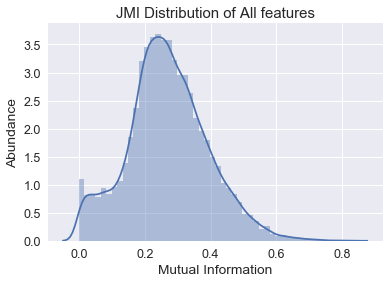

In [50]:
sns.distplot(mi_f_d)
plt.xlabel('Mutual Information')
plt.ylabel('Abundance')
plt.title('JMI Distribution of All features')

In [29]:
top_200_features_indices = mi_f_d.sort_values(by=[0], ascending=False).index[0:200]
top_200_features = data[top_200_features_indices]

In [47]:
mutual_info_score(x_train[0], x_train[1])

1.2033855287425963

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Results (K = 200)')

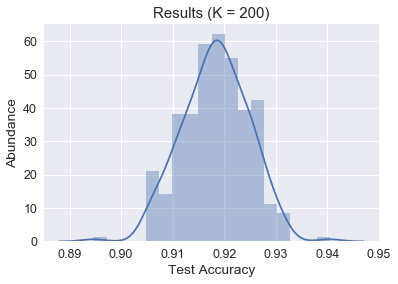

In [74]:
results_200 = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)[[1, 2]]
results_50 = pd.read_csv('../New Results/Results/CSVs/result_50.csv', header=None)[[1, 2]]
results_noised_01 = pd.read_csv('../New Results/Results/CSVs/result_noised_0.01.csv', header=None)
results_noised_05 = pd.read_csv('../New Results/Results/CSVs/result_noised_0.05.csv', header=None)
results_noised_1 = pd.read_csv('../New Results/Results/CSVs/result_noised_0.1.csv', header=None)

results_200 = results_200.drop([0], axis=0)
results_50 = results_50.drop([0], axis=0)
results_noised_01 = results_noised_01.drop([0], axis=0)
results_noised_05 = results_noised_05.drop([0], axis=0)
results_noised_1 = results_noised_1.drop([0], axis=0)

sns.distplot(results_200[1])
plt.xlabel('Test Accuracy')
plt.ylabel('Abundance')
plt.title('Results (K = 200)')

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Results (K = 50)')

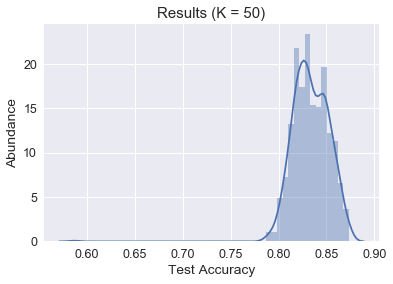

In [75]:
sns.distplot(results_50[1])
plt.xlabel('Test Accuracy')
plt.ylabel('Abundance')
plt.title('Results (K = 50)')

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Results (K = 200) (Noise = 0.01)')

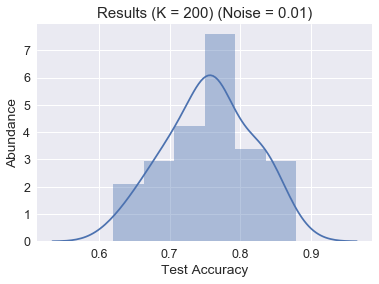

In [80]:
sns.distplot(results_noised_01[1])
plt.xlabel('Test Accuracy')
plt.ylabel('Abundance')
plt.title('Results (K = 200) (Noise = 0.01)')

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Results (K = 200) (Noise = 0.05)')

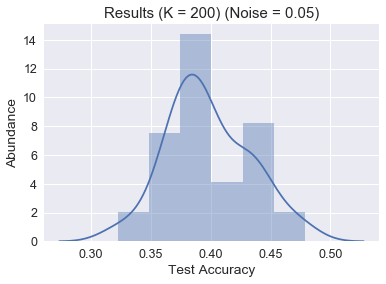

In [81]:
sns.distplot(results_noised_05[1])
plt.xlabel('Test Accuracy')
plt.ylabel('Abundance')
plt.title('Results (K = 200) (Noise = 0.05)')

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Results (K = 200) (Noise = 0.1)')

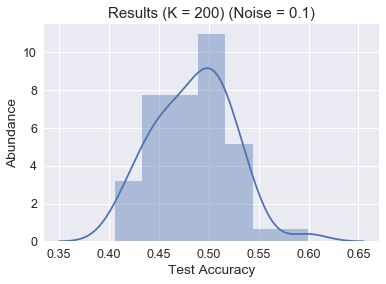

In [82]:
sns.distplot(results_noised_1[1])
plt.xlabel('Test Accuracy')
plt.ylabel('Abundance')
plt.title('Results (K = 200) (Noise = 0.1)')

In [97]:
import scipy as sc

# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

In [98]:
probs = []
for i in range(10):
    random_feature_indices = np.random.choice(19671, 200, replace=False)
    x_train = data[random_feature_indices]
    mi_features_classes = mutual_info_classif(x_train, labels)
    probs.append((ent(labels[0]) - ((1.0 / 200) * sum(mi_features_classes)) - 1) / 2.3010)

/Users/Future/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Future/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Future/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Future/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [99]:
probs

[0.8728594743089122,
 0.8701897346654769,
 0.8802118997137023,
 0.8773387901078249,
 0.8761208837818424,
 0.874520121067,
 0.873175564710413,
 0.8721925717804763,
 0.8765617442215569,
 0.881045112486446]